<h1>Thực hành code EDA tuần 4</h1>


# I. Thống kê mô tả


## Nhiệm vụ 1: Khám phá dữ liệu COVID

lấy tại: https://ourworldindata.org /coronavirus


### 1. Tính mean, median, mode, variance, standard deviation, range, percentile, quartile, interquartile range (IQR) sử dụng thư viện numpy và stats trên tập dữ liệu COVID.


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
# Load the .csv into a dataframe using read_csv
covid_data = pd.read_csv("./Dataset/covid/compact.csv")
covid_data = covid_data[['code','continent','country','date','total_cases','new_cases']]
# Take a quick look at the data
covid_data.head(5)
covid_data.dtypes
covid_data.shape
# Get the mean of the data
data_mean = np.mean(covid_data["new_cases"])
# Get the median of the data
data_median = np.median(covid_data["new_cases"])
# Get the mode of the data
data_mode = stats.mode(covid_data["new_cases"])
# Obtain the variance of the data
data_variance = np.var(covid_data["new_cases"])
# Obtain the standard deviation of the data
data_sd = np.std(covid_data["new_cases"])
# Compute the maximum and minimum values of the data
data_max = np.max(covid_data["new_cases"])
data_min = np.min(covid_data["new_cases"])
# Obtain the 60th percentile of the data
data_percentile = np.percentile(covid_data["new_cases"],60)
# Obtain the quartiles of the data
data_quartile = np.quantile(covid_data["new_cases"],0.75)
# Get the IQR of the data
data_IQR = stats.iqr(covid_data["new_cases"])

In [ ]:
data_mean

np.float64(10590.082678546372)

In [ ]:
data_median

np.float64(nan)

In [ ]:
data_mode

ModeResult(mode=np.float64(0.0), count=np.int64(316034))

In [ ]:
data_variance

np.float64(13834902307.982916)

In [ ]:
data_sd

np.float64(117621.86152235015)

In [ ]:
data_max

np.float64(8401906.0)

In [ ]:
data_min

np.float64(0.0)

In [ ]:
data_percentile

np.float64(nan)

In [ ]:
data_quartile

np.float64(nan)

In [ ]:
data_IQR

np.float64(nan)

## Nhiệm vụ 2: Khám phá và xử lý dữ liệu Marketing Campaign

lấy tại: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis


### 1. Import thư viện và nạp dữ liệu vào notebook


In [ ]:
import pandas as pd
marketing_data = pd.read_csv("./Dataset/Marketing Campaign/marketing_campaign.csv", sep="\t")
marketing_data = marketing_data[['ID','Year_Birth', 'Education','Marital_Status','Income','Kidhome', 'Teenhome','Dt_Customer', 'Recency','NumStorePurchases','NumWebVisitsMonth']]

### 2. Loại bỏ dữ liệu trùng lặp


In [ ]:
marketing_data.head()
# Remove duplicates across the columns in our dataset:
marketing_data_duplicate = marketing_data.drop_duplicates()
# Delete a specified row at index value 1:
marketing_data.drop(labels=[1], axis=0)
# Delete a single column
marketing_data.drop(labels=['Year_Birth'], axis=1)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumStorePurchases,NumWebVisitsMonth
0,5524,Graduation,Single,58138.0,0,0,04-09-2012,58,4,7
1,2174,Graduation,Single,46344.0,1,1,08-03-2014,38,2,5
2,4141,Graduation,Together,71613.0,0,0,21-08-2013,26,10,4
3,6182,Graduation,Together,26646.0,1,0,10-02-2014,26,4,6
4,5324,PhD,Married,58293.0,1,0,19-01-2014,94,6,5
...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,13-06-2013,46,4,5
2236,4001,PhD,Together,64014.0,2,1,10-06-2014,56,5,7
2237,7270,Graduation,Divorced,56981.0,0,0,25-01-2014,91,13,6
2238,8235,Master,Together,69245.0,0,1,24-01-2014,8,10,3


### 3. Thay thế dữ liệu và thay đổi định dạng của dữ liệu


In [ ]:
# Replace the values in Teenhome with has teen and has no teen
marketing_data['Teenhome_replaced'] = marketing_data['Teenhome'].replace([0,1,2],['has no teen','has teen','has teen'])
# Fill NAs in the Income column
marketing_data['Income'] = marketing_data['Income'].fillna(0)
# Change the data type of the Income column from float to int
marketing_data['Income_changed'] = marketing_data['Income'].astype(int)

### 4. Xử lý dữ liệu thiếu


In [ ]:
# Check for missing values using the isnull and sum methods
marketing_data.isnull().sum()
# Drop missing values using the dropna method
marketing_data_withoutna = marketing_data.dropna(how = 'any')
marketing_data_withoutna.shape

(2240, 13)

# II. Xử lý và trực quan hóa dữ liệu


## Thực hiện các nhiệm vụ trong bài toán để làm quen với các công cụ trực quan hóa dữ liệu.

Dữ liệu thực hiện là dữ liệu về giá nhà lấy từ: https://www.kaggle.com/datasets/thomasnibb/amsterdam-house-price-prediction


### 1. Chuẩn bị dữ liệu cho trực quan hóa dữ liệu


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
houseprices_data = pd.read_csv("./Dataset/HousePrices/HousingPrices-Amsterdam-August-2021.csv")
houseprices_data = houseprices_data[['Zip', 'Price', 'Area', 'Room']]
# Create a PriceperSqm variable based on the Price and Area variables:
houseprices_data['PriceperSqm'] = houseprices_data['Price']/houseprices_data['Area']

### 2. Trực quan hóa dữ liệu với thư viện Matplotlib


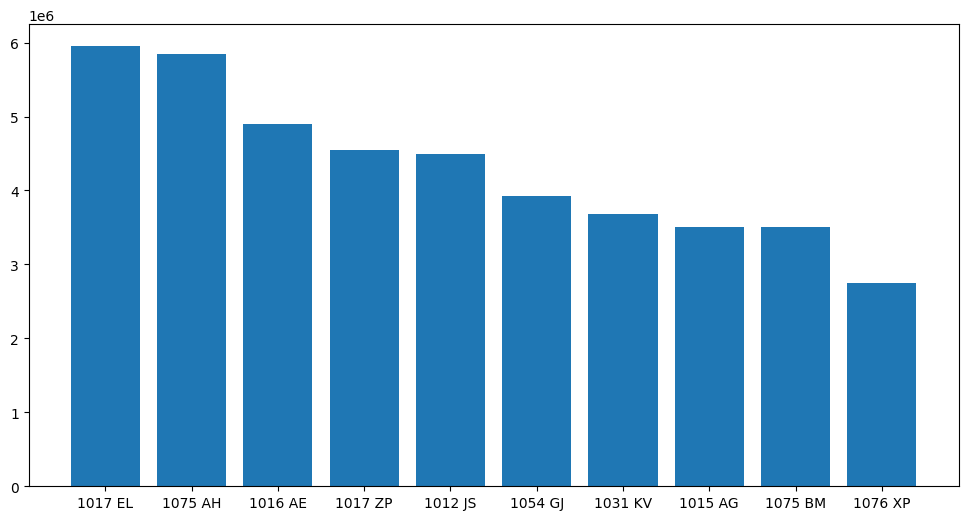

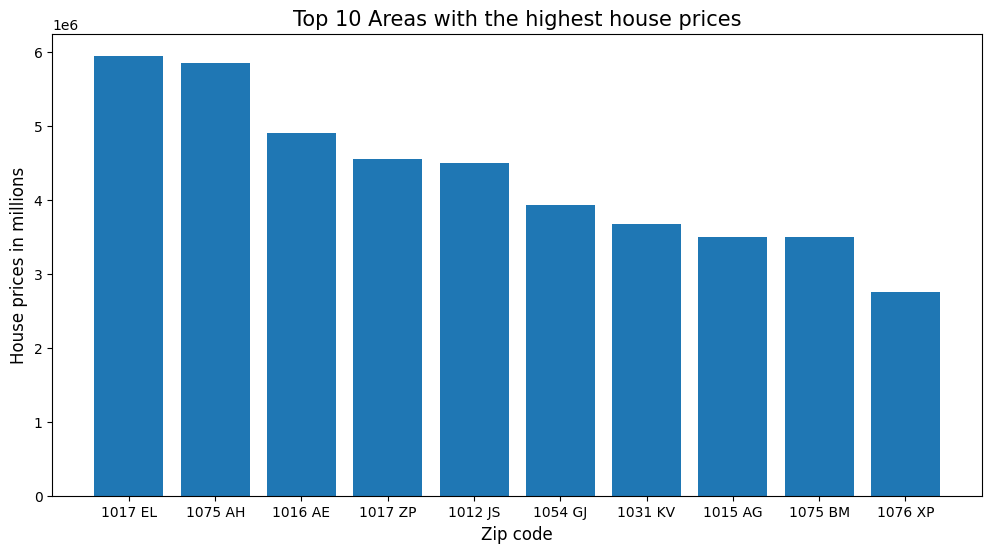

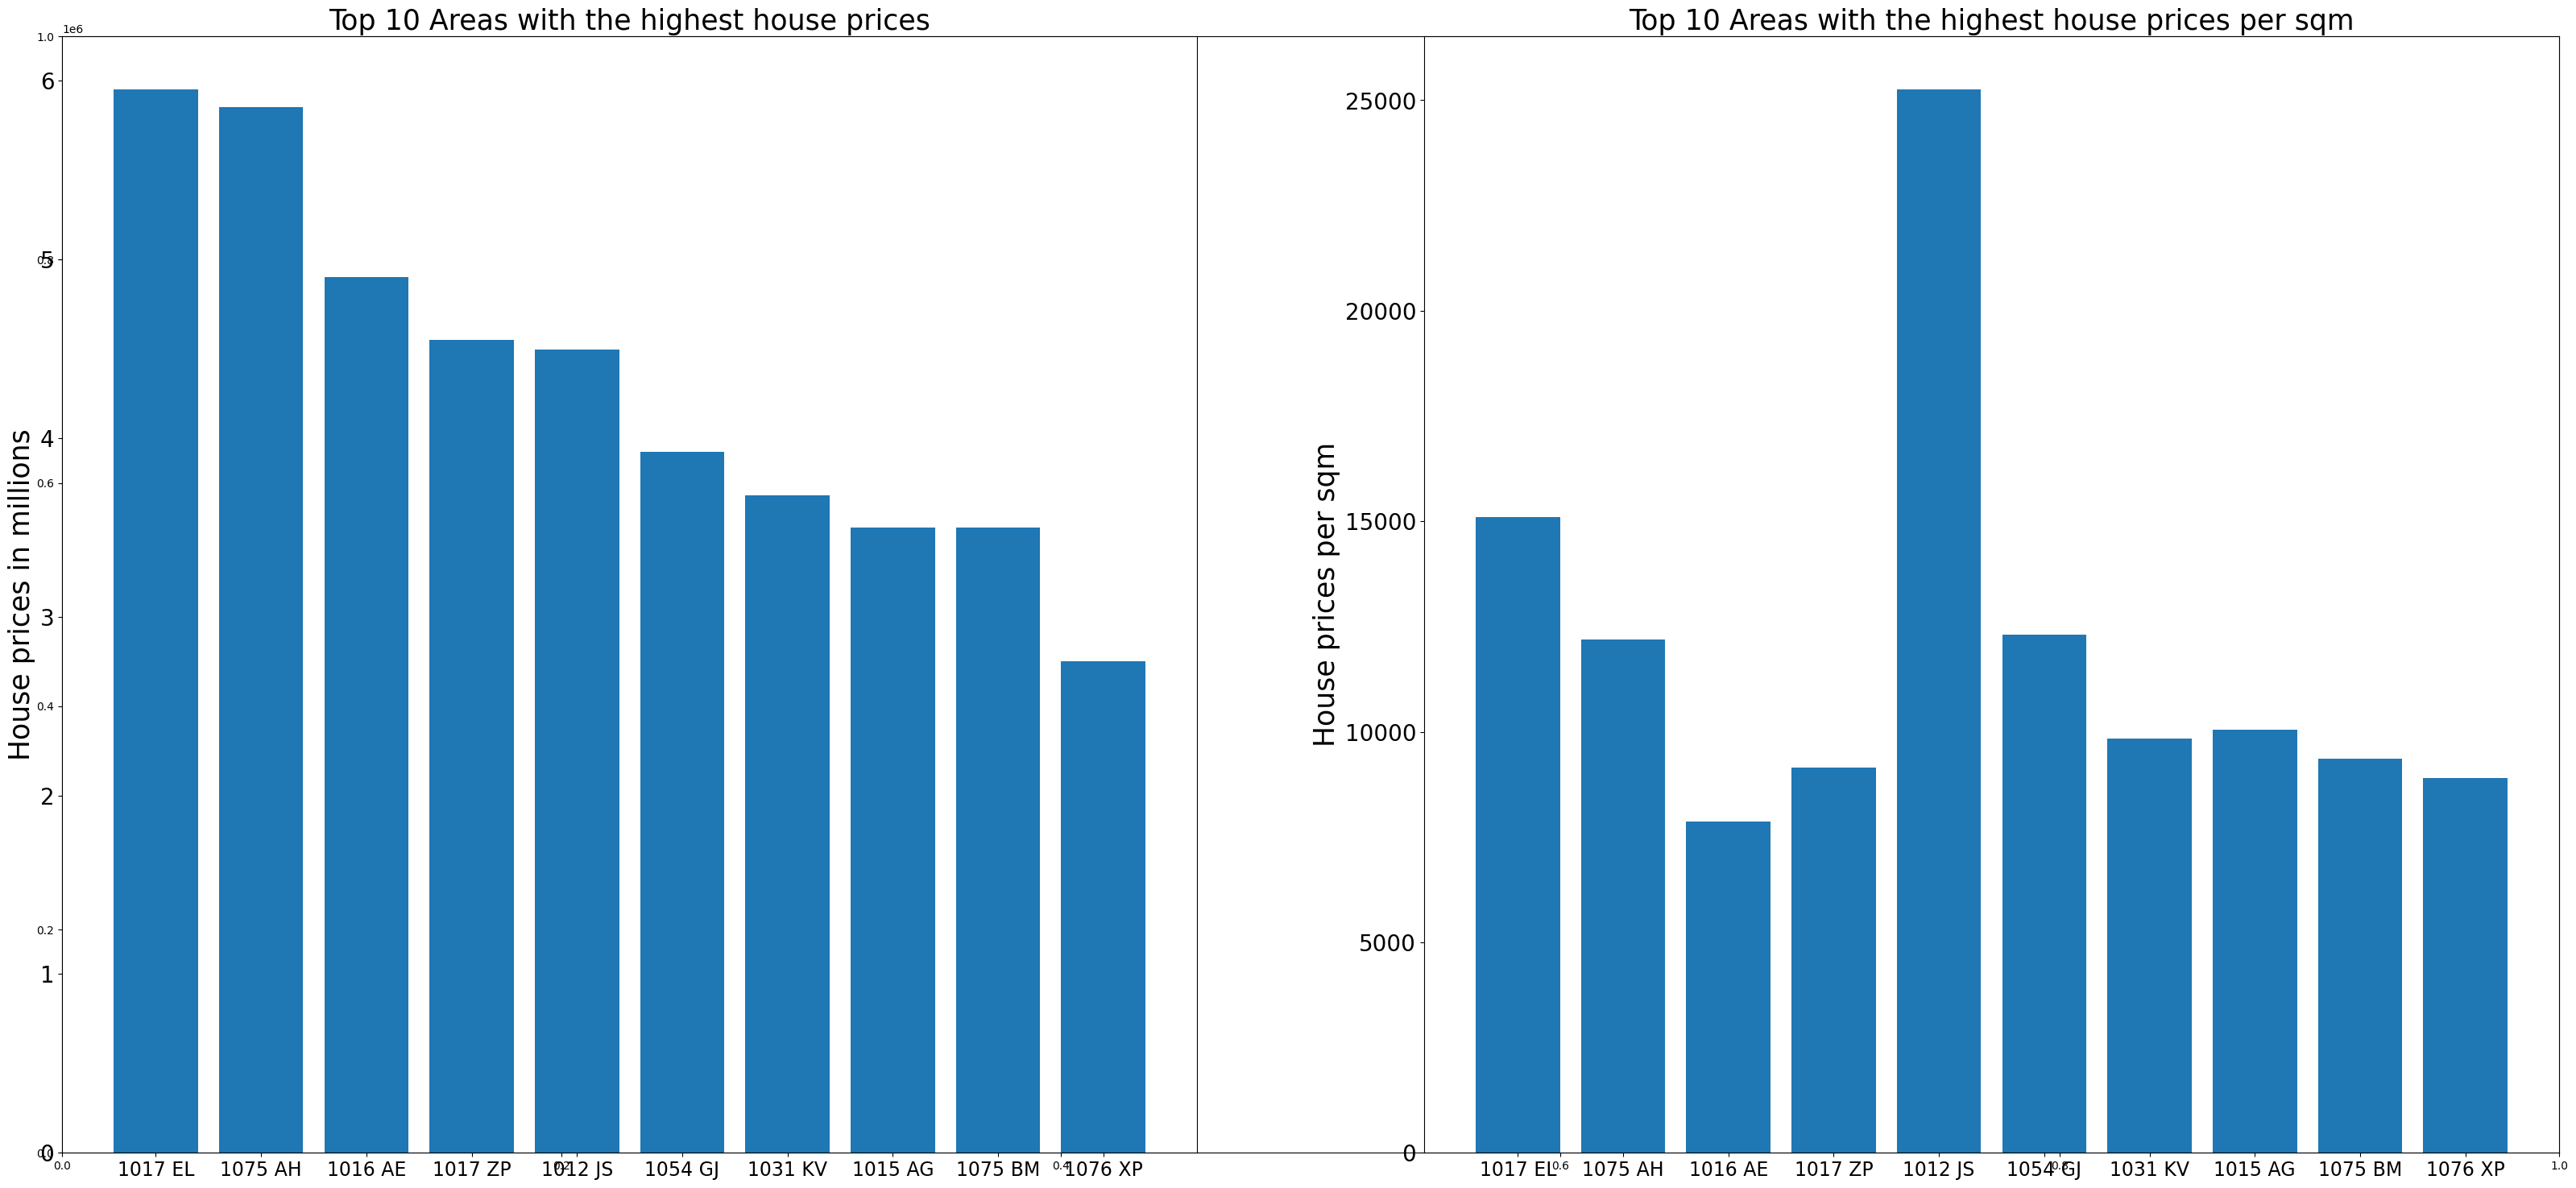

In [ ]:
houseprices_sorted = houseprices_data.sort_values('Price', ascending =
False)
houseprices_sorted.head()
# case 1: basic
plt.figure(figsize= (12,6))
x = houseprices_sorted['Zip'][0:10]
y = houseprices_sorted['Price'][0:10]
plt.bar(x,y)
plt.show()
# case 2: advanced 1
plt.figure(figsize= (12,6))
plt.bar(x,y)
plt.title('Top 10 Areas with the highest house prices', fontsize=15)
plt.xlabel('Zip code', fontsize = 12)
plt.xticks(fontsize=10)
plt.ylabel('House prices in millions', fontsize=12)
plt.yticks(fontsize=10)
plt.show()
# case 3: advanced 2
fig, ax = plt.subplots(figsize=(40,18))
x = houseprices_sorted['Zip'][0:10]
y = houseprices_sorted['Price'][0:10]
y1 = houseprices_sorted['PriceperSqm'][0:10]
plt.subplot(1,2,1)
plt.bar(x,y)
plt.xticks(fontsize=17)
plt.ylabel('House prices in millions', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Top 10 Areas with the highest house prices',
fontsize=25)
plt.subplot(1,2,2)
plt.bar(x,y1)
plt.xticks(fontsize=17)
plt.ylabel('House prices per sqm', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Top 10 Areas with the highest house prices per sqm',
fontsize=25)
plt.show()

### 3. Trực quan hóa dữ liệu với thư viện Seaborn


Text(0.5, 1.0, 'Top 10 Areas with the highest price per sqm')

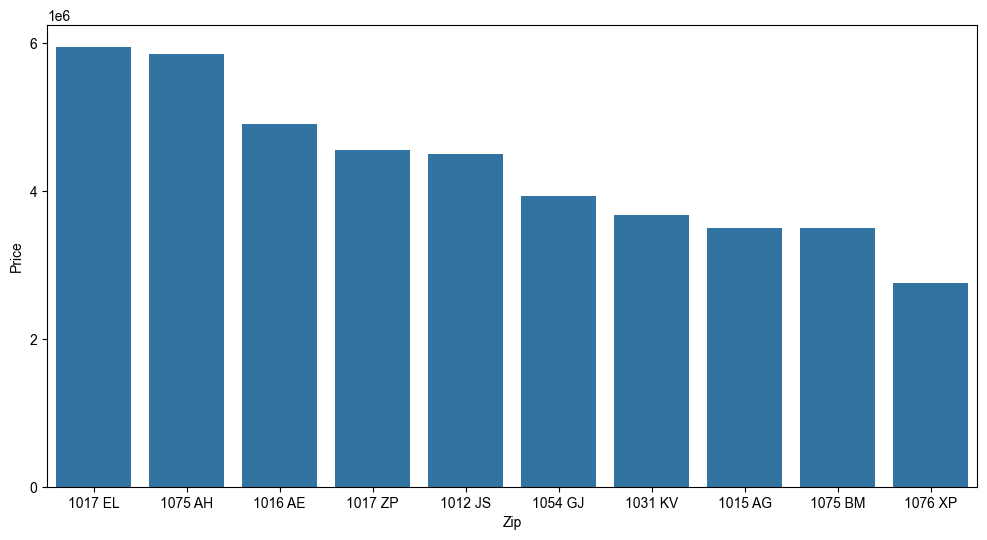

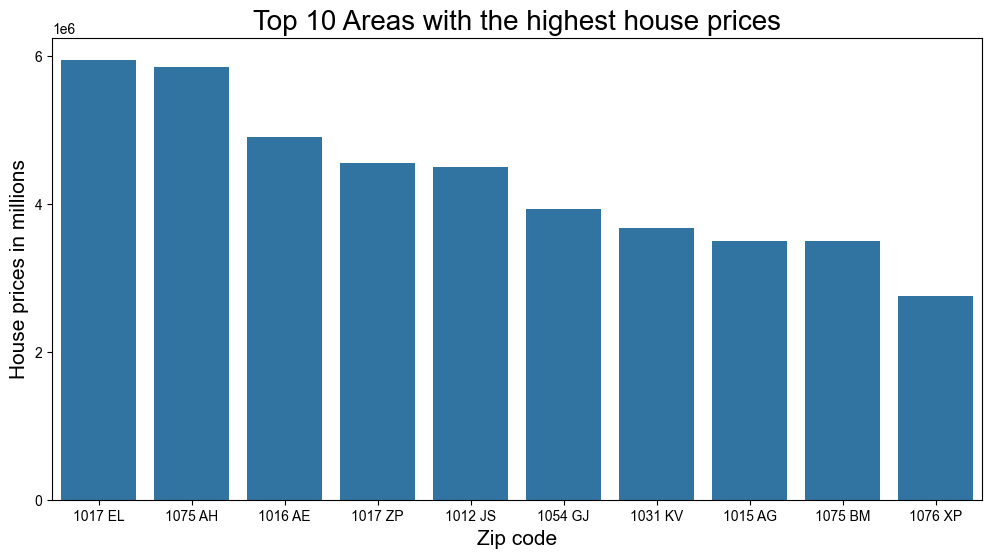

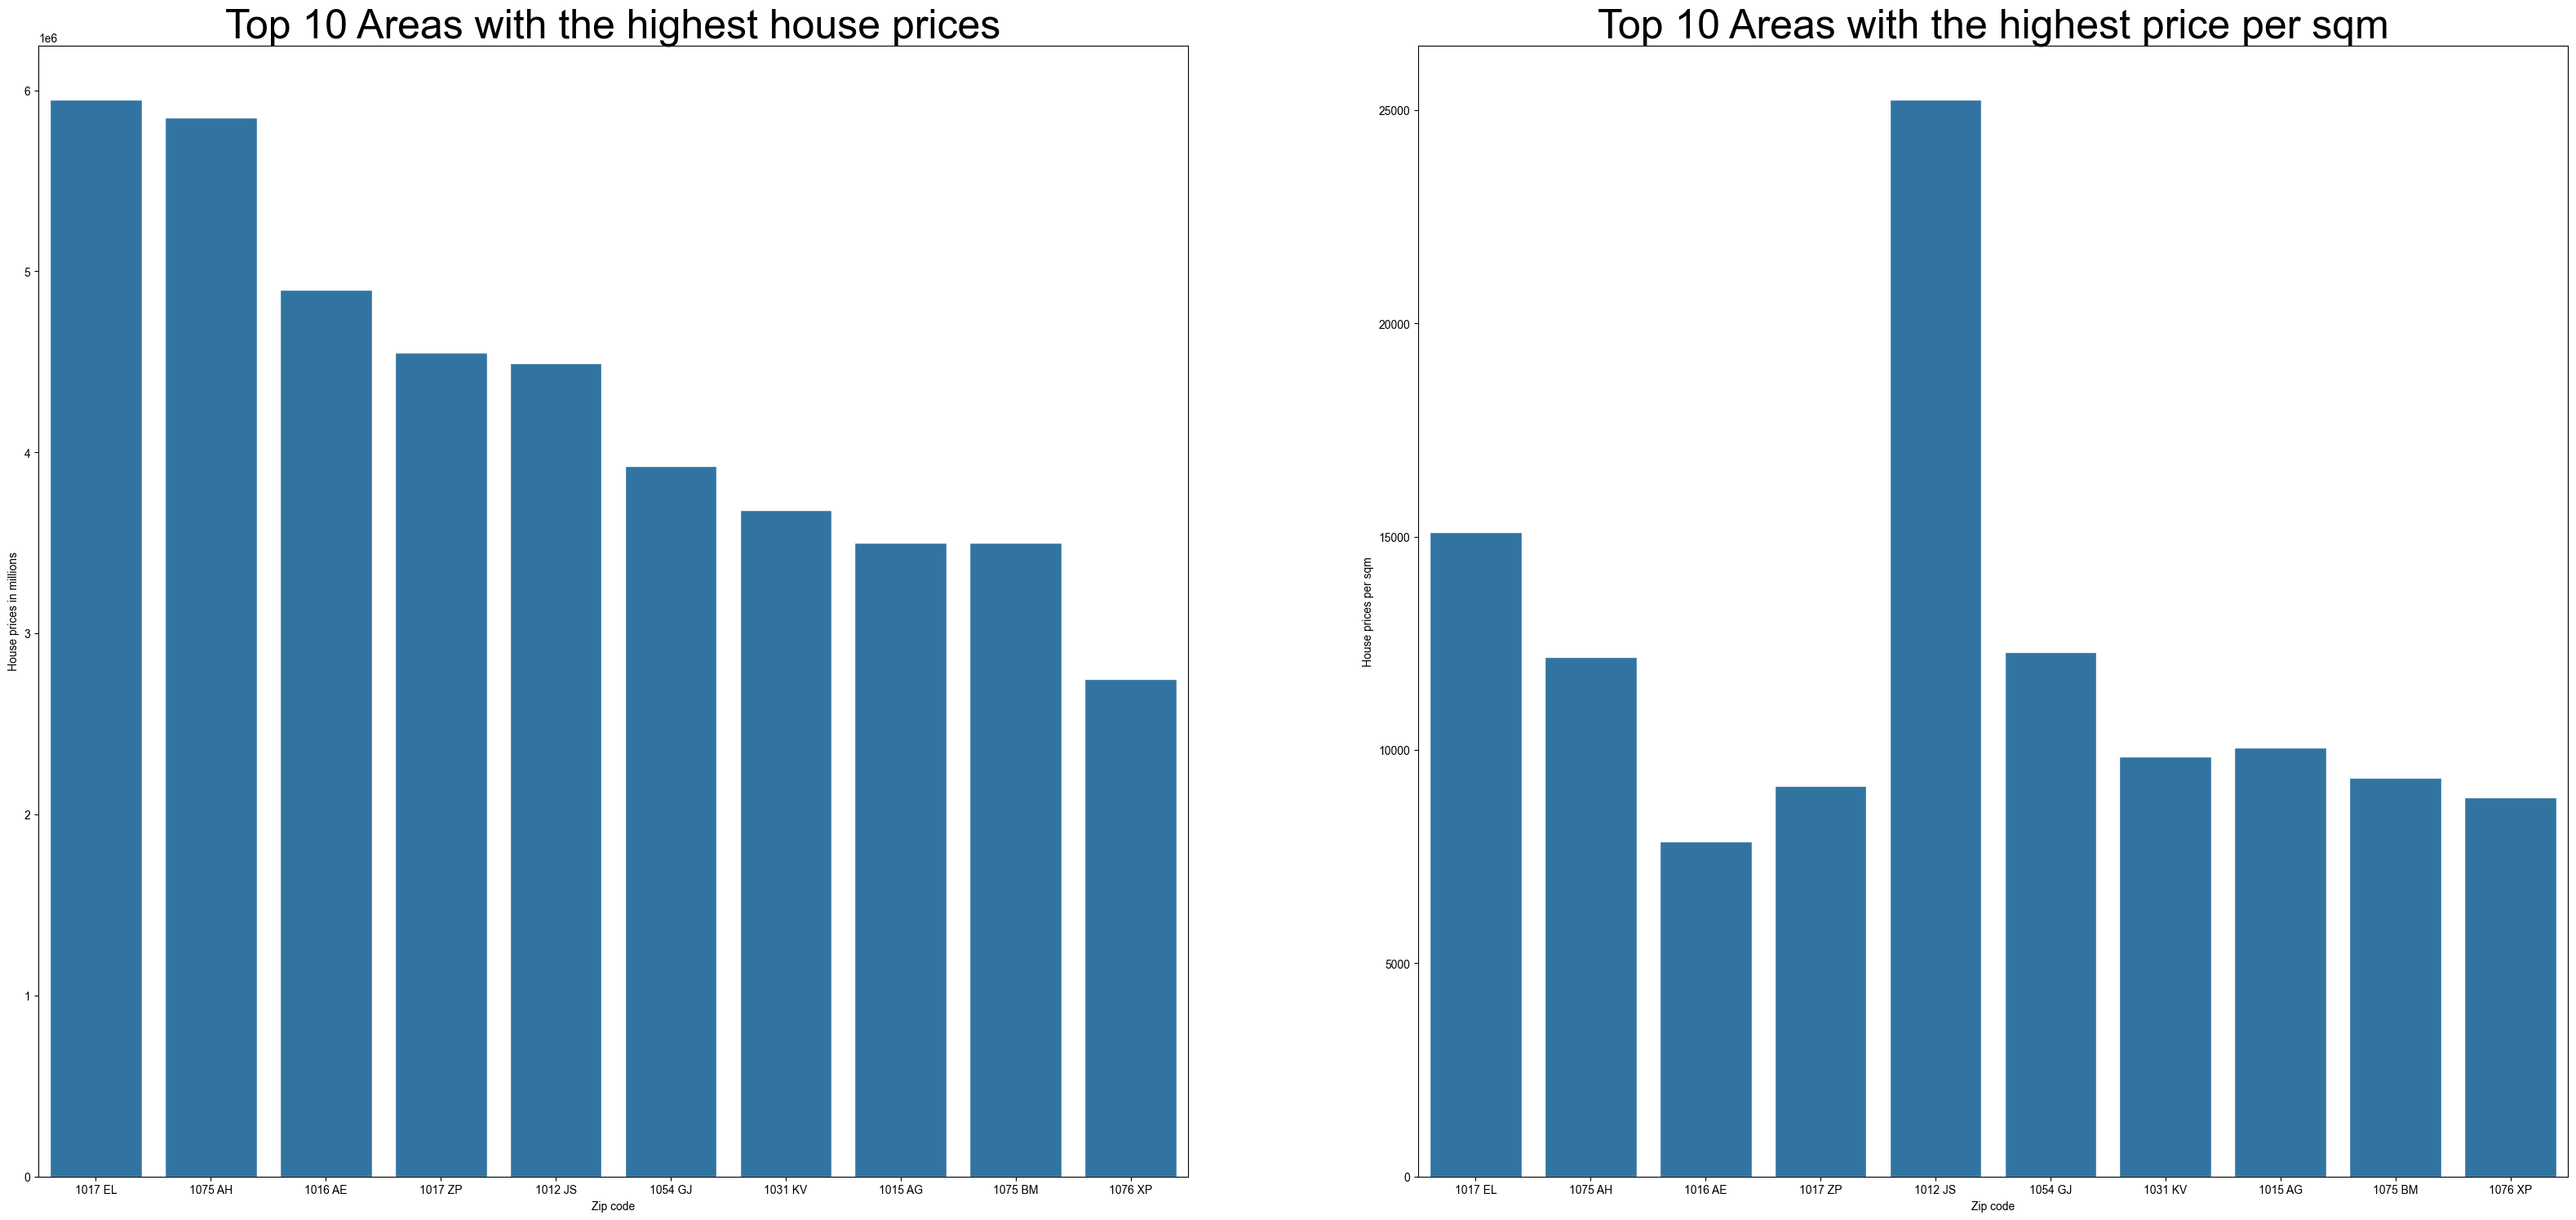

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# case 1: basic
plt.figure(figsize= (12,6))
data = houseprices_sorted[0:10]
sns.barplot(data= data, x= 'Zip',y = 'Price')
# case 2: advanced 1
plt.figure(figsize= (12,6))
data = houseprices_sorted[0:10]
ax = sns.barplot(data= data, x= 'Zip',y = 'Price')
ax.set_xlabel('Zip code',fontsize = 15)
ax.set_ylabel('House prices in millions', fontsize = 15)
ax.set_title('Top 10 Areas with the highest house prices', fontsize= 20)
# case 3: view multiple perspectives at once
fig, ax = plt.subplots(1, 2,figsize=(40,18))
data = houseprices_sorted[0:10]
sns.set(font_scale = 3)
ax1 = sns.barplot(data= data, x= 'Zip',y = 'Price', ax = ax[0])
ax1.set_xlabel('Zip code')
ax1.set_ylabel('House prices in millions')
ax1.set_title('Top 10 Areas with the highest house prices')
ax2 = sns.barplot(data= data, x= 'Zip',y = 'PriceperSqm',
ax=ax[1])
ax2.set_xlabel('Zip code')
ax2.set_ylabel('House prices per sqm')
ax2.set_title('Top 10 Areas with the highest price per sqm')

# III. Phân tích đơn biến và hai biến


## Bài toán 1: Thực hiện các nhiệm vụ trong bài toán 1 để làm quen với các hàm và thư viện hỗ trợ phân tích dữ liệu đơn biến. Bài toán này được thực hiện trên 2 tập dữ liệu là tập dữ liệu về chim cánh cụt và tập dữ liệu giá nhà.


### Nhiệm vụ 1: phân tích dữ liệu đơn biến trên dữ liệu về chim cánh cụt

lấy tại: https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data


#### 1. Import thư viện và nạp dữ liệu


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
penguins_data = pd.read_csv("./Dataset/Penguins/penguins_size.csv")
penguins_data = penguins_data[['species','culmen_length_mm']]

#### 2. Phân tích đơn biến bằng Histogram


Text(0.5, 1.0, 'Univariate analysis of Culmen Length')

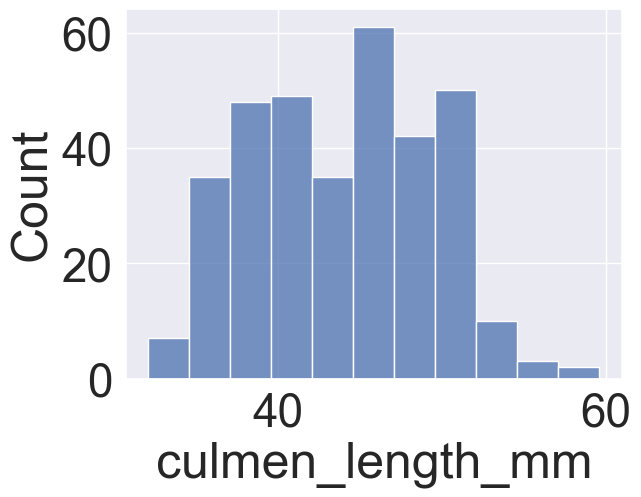

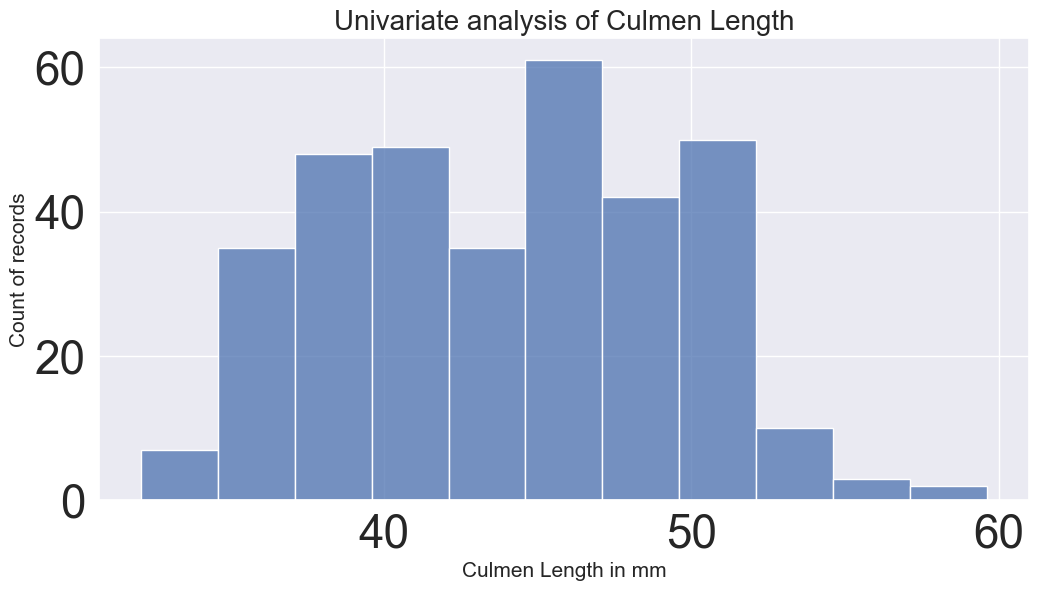

In [ ]:
# case 1: basic
sns.histplot( data = penguins_data, x= penguins_data["culmen_length_mm"])
# case 2: advanced
plt.figure(figsize= (12,6))
ax = sns.histplot( data = penguins_data, x=penguins_data["culmen_length_mm"])
ax.set_xlabel('Culmen Length in mm',fontsize = 15)
ax.set_ylabel('Count of records', fontsize = 15)
ax.set_title('Univariate analysis of Culmen Length',fontsize= 20)

#### 3. Phân tích đơn biến bằng bar chart


Text(0.5, 1.0, 'Univariate analysis of Culmen Length')

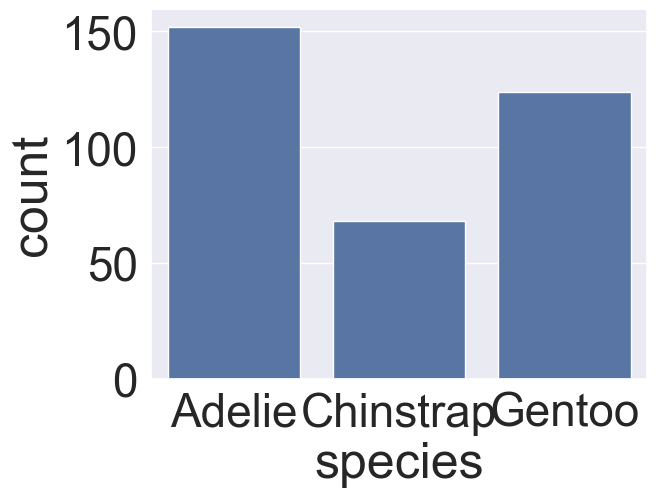

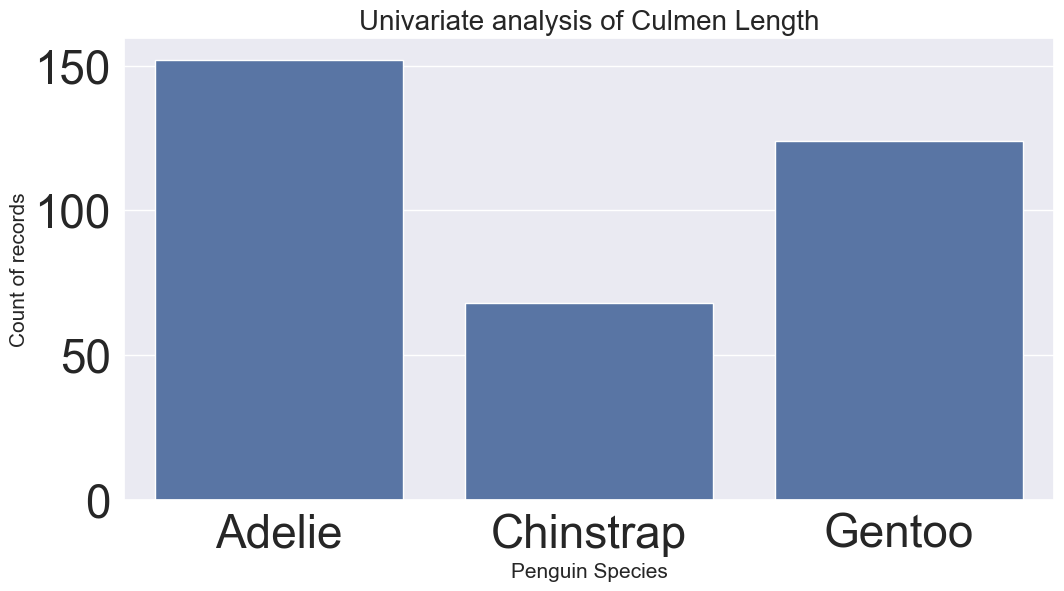

In [ ]:
# case 1: basic
sns.countplot(data = penguins_data, x= penguins_data['species'])
# case 2: advanced
plt.figure(figsize= (12,6))
ax = sns.countplot(data = penguins_data, x= penguins_data['species'])
ax.set_xlabel('Penguin Species',fontsize = 15)
ax.set_ylabel('Count of records',fontsize = 15)
ax.set_title('Univariate analysis of Penguin Species', fontsize= 20)
ax.set_title('Univariate analysis of Culmen Length', fontsize= 20)

#### 4. Phân tích đơn biến bằng biểu đồ tròn (Pie-chart)


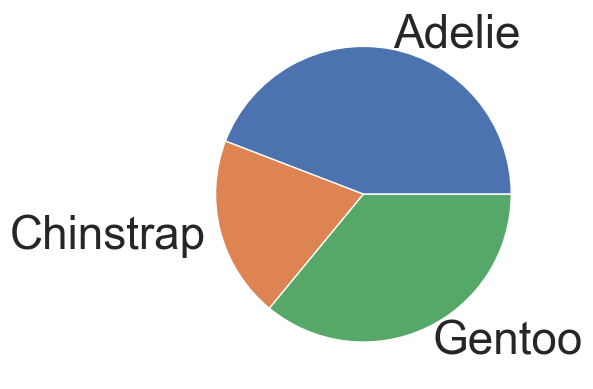

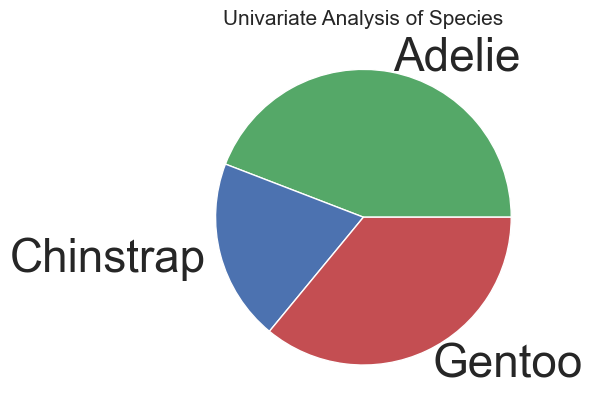

In [ ]:
penguins_group = penguins_data.groupby('species').count()
penguins_group = penguins_group.reset_index()
# case 1: basic
plt.pie(penguins_group["culmen_length_mm"], labels = penguins_group['species'])
plt.show()
# case 2: advanced
cols = ['g', 'b', 'r']
plt.pie(penguins_group["culmen_length_mm"], labels = penguins_group['species'],colors = cols)
plt.title('Univariate Analysis of Species', fontsize=15)
plt.show()

### Nhiệm vụ 2: Phân tích dữ liệu đơn biến trên dữ liệu giá nhà

lấy từ: https://www.kaggle.com/datasets/thomasnibb/amsterdam-house-price-prediction


#### 1. Import thư viện, nạp dữ liệu giá nhà và phân tích đơn biến dựa vào boxplot


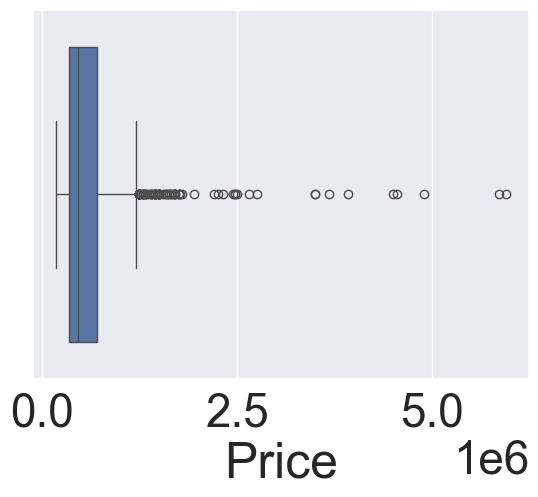

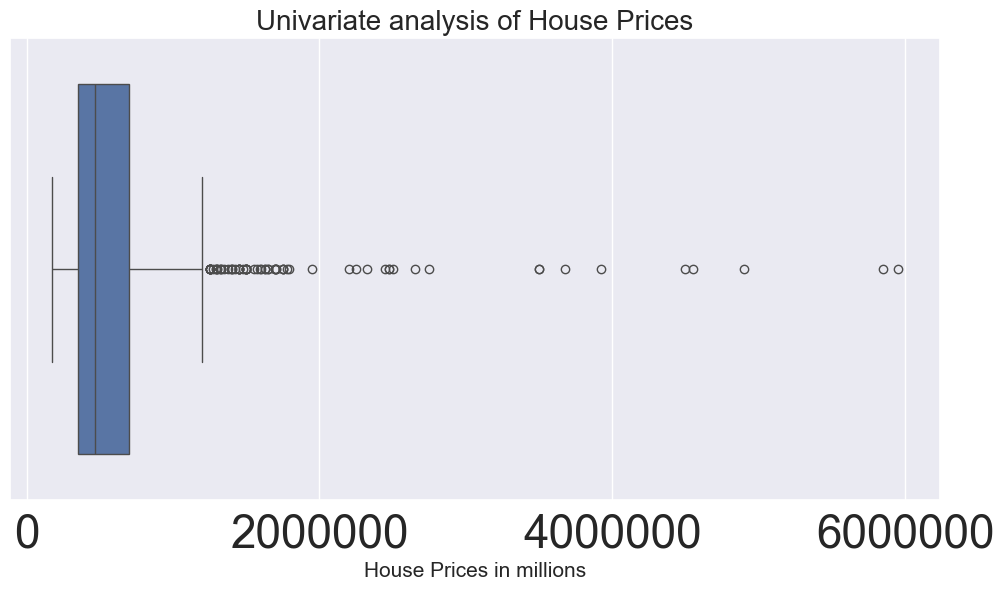

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
houseprices_data = pd.read_csv("./Dataset/HousePrices/HousingPrices-Amsterdam-August-2021.csv")
houseprices_data = houseprices_data[['Zip','Price','Area','Room']]
# case 1: Create a boxplot using the boxplot method
sns.boxplot(data = houseprices_data, x= houseprices_data["Price"])
# case 2: advanced
plt.figure(figsize= (12,6))
ax = sns.boxplot(data = houseprices_data, x= houseprices_data["Price"])
ax.set_xlabel('House Prices in millions',fontsize = 15)
ax.set_title('Univariate analysis of House Prices', fontsize= 20)
plt.ticklabel_format(style='plain', axis='x')

#### 2. Phân tích dữ liệu đơn biến dựa vào violin plot


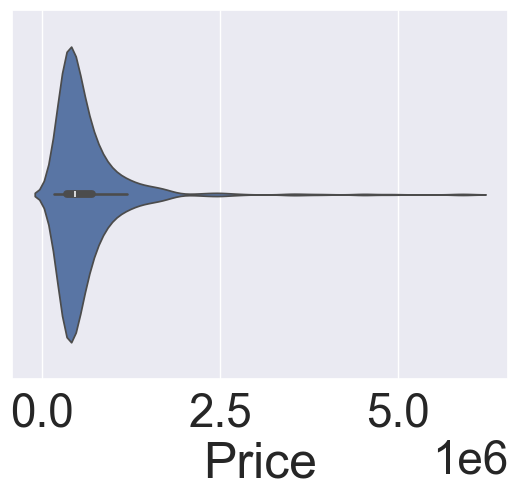

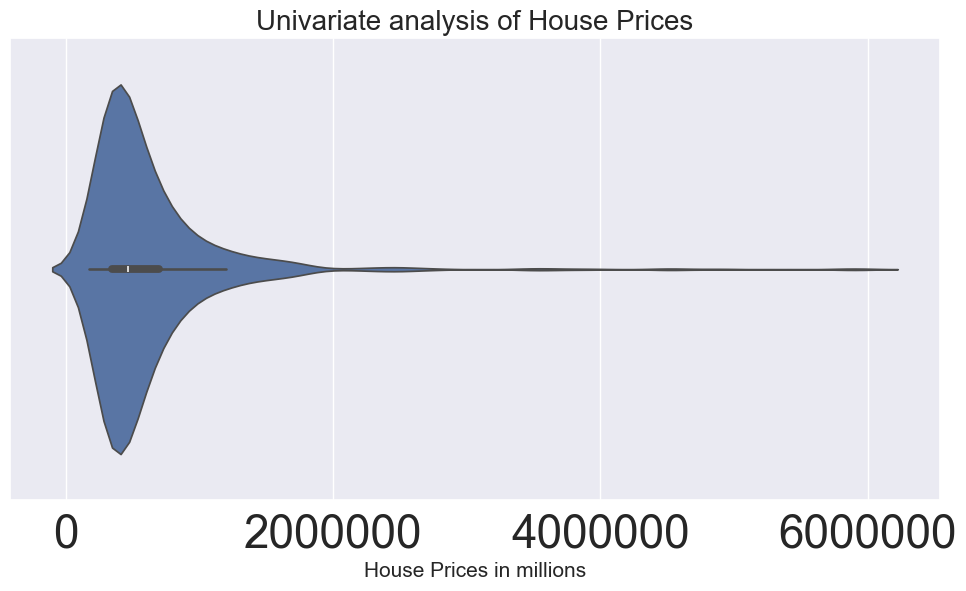

In [ ]:
# case 1: basic
sns.violinplot(data = houseprices_data, x= houseprices_data["Price"])
# case 2: advanced
plt.figure(figsize= (12,6))
ax = sns.violinplot(data = houseprices_data, x=houseprices_data["Price"])
ax.set_xlabel('House Prices in millions',fontsize = 15)
ax.set_title('Univariate analysis of House Prices', fontsize= 20)
plt.ticklabel_format(style='plain', axis='x')

#### 3. Phân tích dữ liệu đơn biến dựa vào bản tóm tắt dữ liệu


In [ ]:
houseprices_data.describe()

,Price,Area,Room
count,9.200000e+02,924.000000,924.000000
mean,6.220654e+05,95.952381,3.571429
std,5.389942e+05,57.447436,1.592332
min,1.750000e+05,21.000000,1.000000
25%,3.500000e+05,60.750000,3.000000
50%,4.670000e+05,83.000000,3.000000
75%,7.000000e+05,113.000000,4.000000
max,5.950000e+06,623.000000,14.000000


## Bài toán 2: Thực hiện các nhiệm vụ trong bài toán 2 để làm quen với việc phân tích hai biến với các hàm trong thư viện scikit-learn.


### Nhiệm vụ 1: phân tích dữ liệu hai biến trên dữ liệu về chim cánh cụt.

Dữ liệu lấy tại: https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data


#### 1. Import thư viện và chuẩn bị dữ liệu phân tích


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
penguins_data = pd.read_csv("./Dataset/Penguins/penguins_size.csv")
penguins_data = penguins_data[['species','culmen_length_mm', 'body_mass_g', 'sex']]

#### 2. Phân tích dữ liệu 2 biến dựa vào phương pháp scatterplot


Text(0.5, 1.0, 'Bivariate analysis of Culmen Length and body mass')

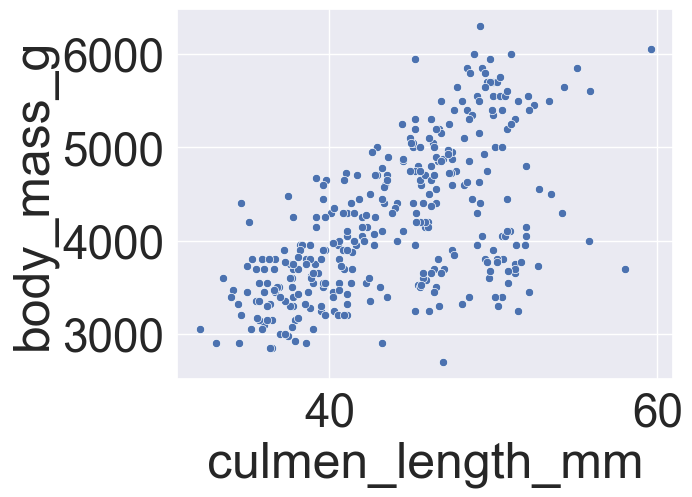

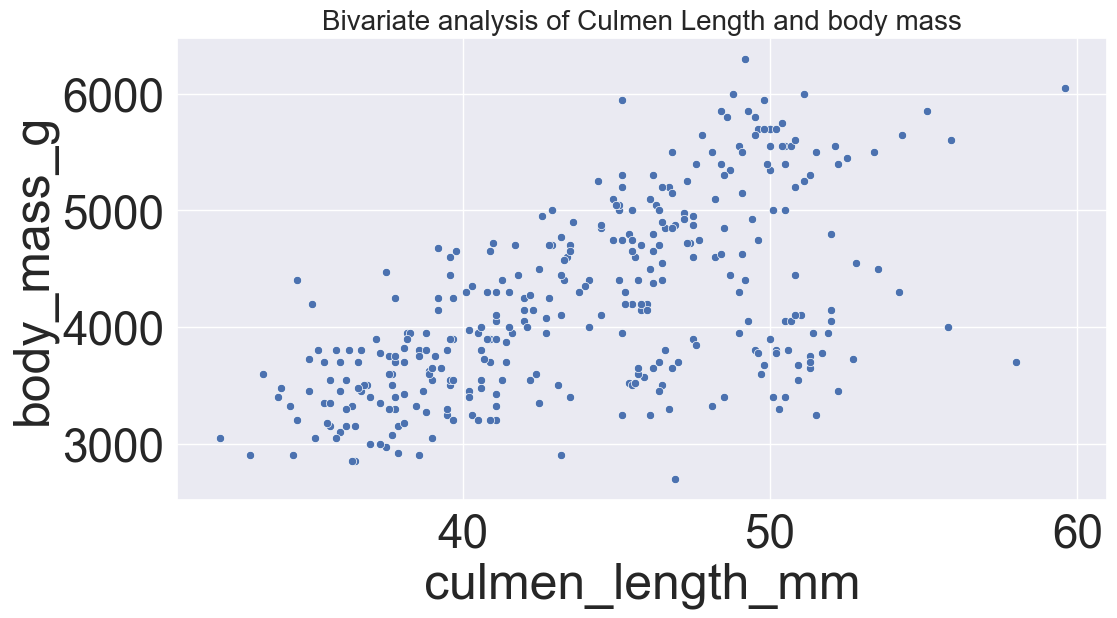

In [ ]:
# case 1: basic
sns.scatterplot(data = penguins_data, x= penguins_data["culmen_length_mm"],
y= penguins_data['body_mass_g'])
# case 2: advanced
plt.figure(figsize= (12,6))
ax = sns.scatterplot(data = penguins_data, x= penguins_data["culmen_length_mm"],
y= penguins_data['body_mass_g'])
ax.set_title('Bivariate analysis of Culmen Length and body mass', fontsize=20)

#### 3. Phân tích 2 biến dựa vào bảng crosstab/two-way


In [ ]:
pd.crosstab(index=penguins_data['species'], columns=penguins_data['sex'])

sex,.,FEMALE,MALE
species,,,
Adelie,0,73,73
Chinstrap,0,34,34
Gentoo,1,58,61


#### 4. Phân tích 2 biến sử dụng pivot_table


In [ ]:
pd.pivot_table(penguins_data, values='culmen_length_mm', index='species', aggfunc=np.mean)

C:\Users\LOQ\AppData\Local\Temp\ipykernel_32136\4185440915.py:1: FutureWarning: The provided callable <function mean at 0x000001987C11F2E0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(penguins_data, values='culmen_length_mm', index='species', aggfunc=np.mean)


,culmen_length_mm
species,
Adelie,38.791391
Chinstrap,48.833824
Gentoo,47.504878


#### 5. Phân tích 2 biến sử dụng pairplot


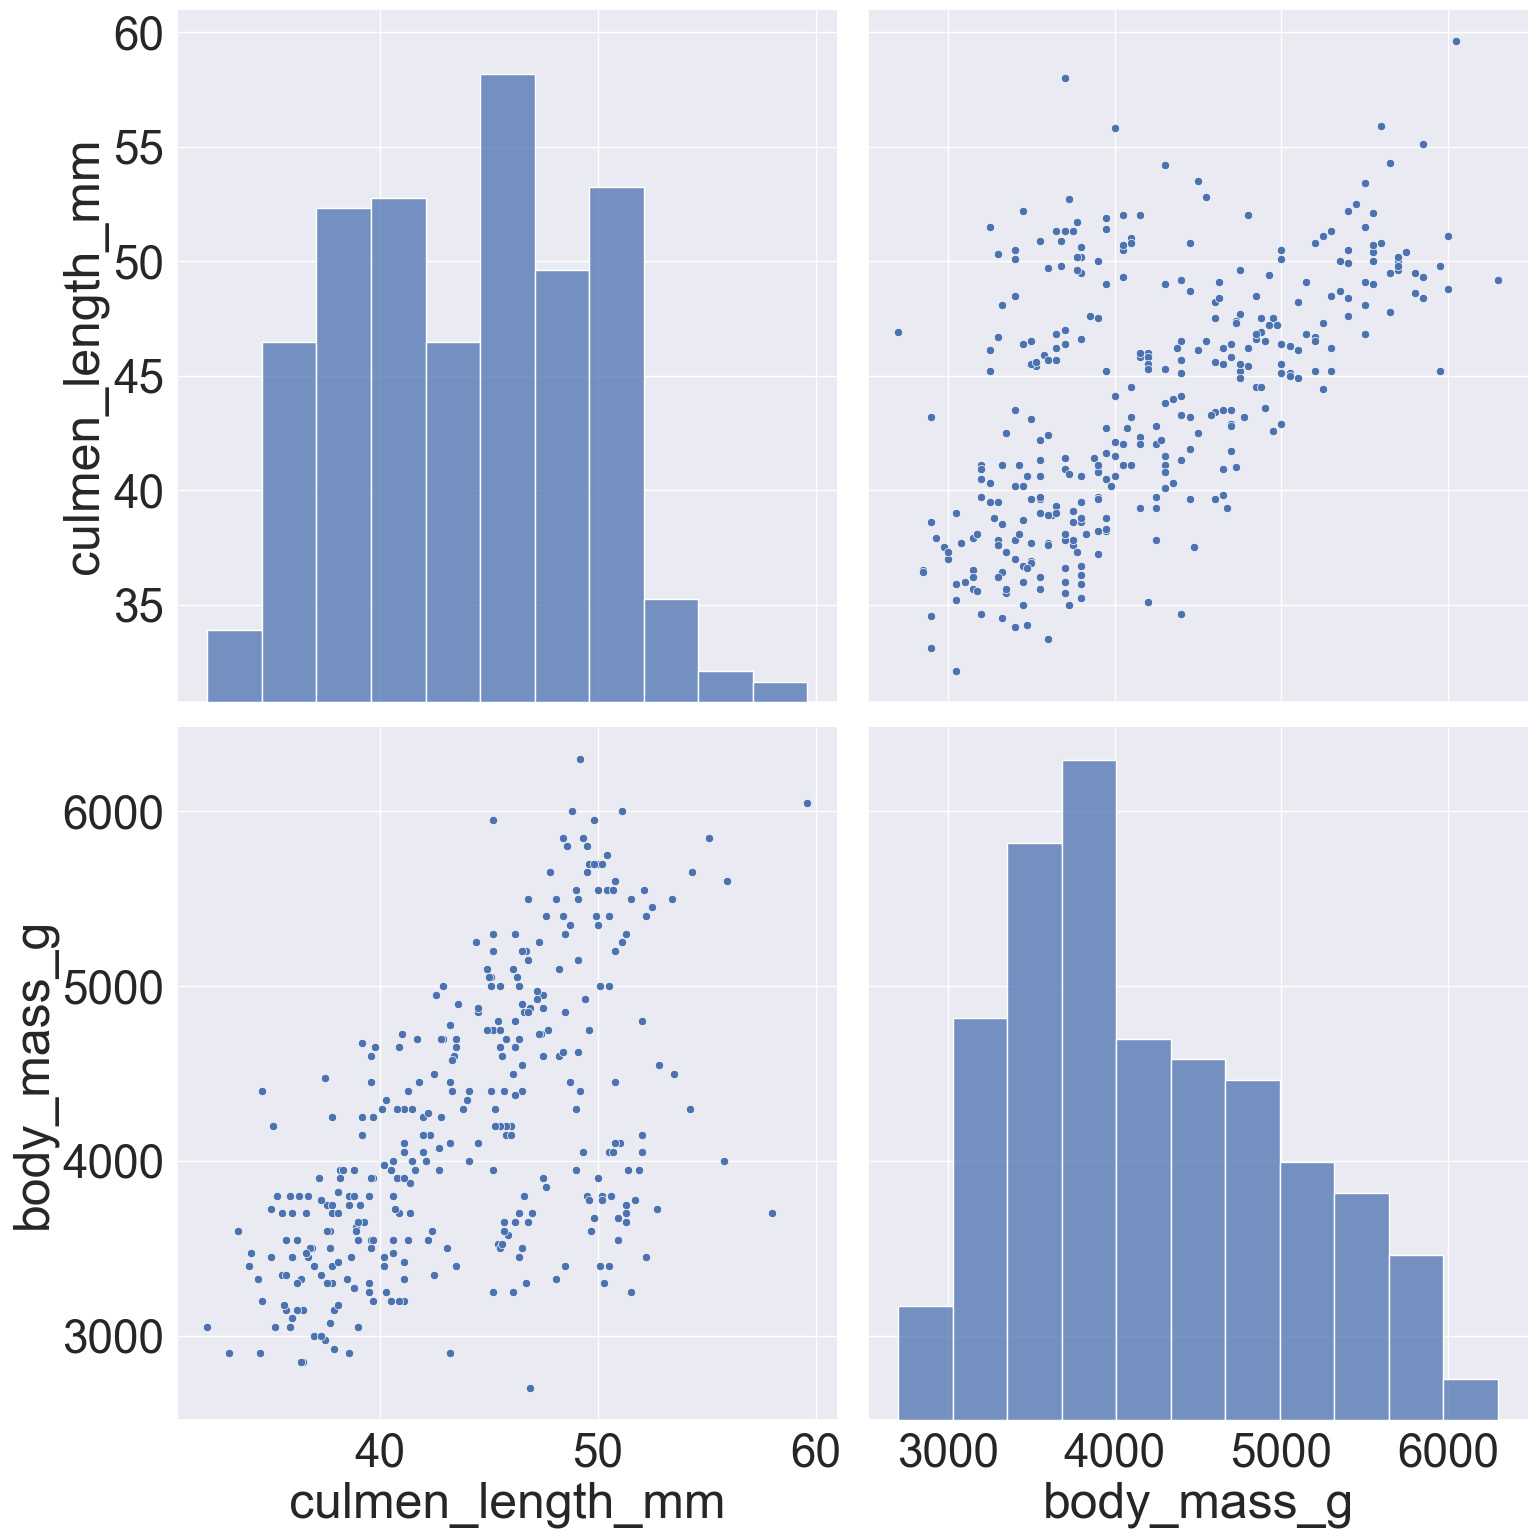

In [ ]:
import seaborn as sns
sns.pairplot( data = penguins_data,
             height=8,  # Kích thước mỗi ô con là 4 inch
            aspect=1,  # Tỷ lệ width/height là 1 (ô vuông)
            )

## Bài toán 3: Thực hiện các nhiệm vụ trong bài toán 3 để làm quen với việc sử dụng các công cụ hỗ trợ EDA tự động.


### Nhiệm vụ 1: Sử dụng pandas profiling trên dữ liệu Customer Personality Analysis.

Dữ liệu lấy tại: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis


#### 1. Cài đặt pandas_profiling sau này đổi tên thành ydata_profiling

(xem thông tin chi tiết tại: https://pypi.org/project/pandas-profiling/3.1.0)


In [1]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2


#### 2. Sử dụng công cụ


In [5]:
import pandas as pd
from ydata_profiling import ProfileReport
marketing_data = pd.read_csv("/content/Dataset/marketing_campaign.csv")
# Create an Automated EDA report using the ProfileReport class in the ydata_profiling library. Use the to_file method to output the report to an HTML file
profile = ProfileReport(marketing_data)
profile.to_file("Reports/profile_output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00,  8.33it/s]
/usr/local/lib/python3.12/dist-packages/ydata_profiling/visualisation/utils.py:73: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/ydata_profiling/visualisation/utils.py:73: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.savefig(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Nhiệm vụ 2: Sử dụng dtale trên dữ liệu Marketing Campaign.

Dữ liệu lấy từ: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis


#### 1. Cài đặt dtale

(xem thông tin chi tiết tại: https://dtale.readthedocs.io/en/latest/)


In [1]:
!pip install dtale

  Using cached certifi-2025.8.3-py3-none-any.whl.metadata (2.4 kB)
     ---------------------------------------- 0.0/642.7 kB ? eta -:--:--
     ---------------------------------------- 642.7/642.7 kB 7.9 MB/s  0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached scipy-1.15.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached statsmodels-0.14.5-cp313-cp313-win_amd64.whl.metadata (9.8 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached charset_normalizer-3.4.3-cp313-cp313-win_amd64.whl.metadata (37 kB)
  Using cached idna-3.

  You can safely remove it manually.
  You can safely remove it manually.


In [2]:
import pandas as pd
import dtale
marketing_data = pd.read_csv("./Dataset/Marketing Campaign/marketing_campaign.csv")
dtale.show(marketing_data).open_browser()